In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U sentence-transformers > /dev/null

In [3]:
!ls 'drive/MyDrive/Colab Notebooks/nlp/clustering kpa'

1_KPA_clustering.ipynb		     4_legal_barh_clustering.ipynb	  data
2_KPA_clustering_fine-tunning.ipynb  5_legal_clustering_legal_bert.ipynb
3_legal_clustering.ipynb	     6_legal_clustering_topic_bert.ipynb


In [4]:
import json
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [5]:
random_state = 321

# Train/Dev/Test split

In [6]:
legal_data = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments.csv')

In [7]:
legal_data.head(2)

,id,argument
0,1,The Commission notes that the applicant was de...
1,2,He was released after the Court of Appeal revi...


# Calc embeddings

In [8]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('nlpaueb/bert-base-uncased-echr')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/nlpaueb_bert-base-uncased-echr. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/nlpaueb_bert-base-uncased-echr were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initial

# Try encoding

In [9]:
%%time
some_examples = legal_data.head(10).copy()
some_examples['embedding'] = some_examples['argument'].apply(lambda x: model.encode(x))

CPU times: user 2.79 s, sys: 1.4 s, total: 4.19 s
Wall time: 11.7 s


In [10]:
some_examples.head()

,id,argument,embedding
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024..."
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862..."
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031..."
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939..."
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367..."


In [11]:
model_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(some_examples['embedding'].tolist())
some_examples['tsne_30_x'] = tsne[:,0]
some_examples['tsne_30_y'] = tsne[:,1]
some_examples.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


,id,argument,embedding,tsne_30_x,tsne_30_y
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-214.118759,-235.422485
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-300.542175,-25.022892
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",-27.504923,281.010132
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",-74.031166,-78.236710
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",-169.117203,132.537888


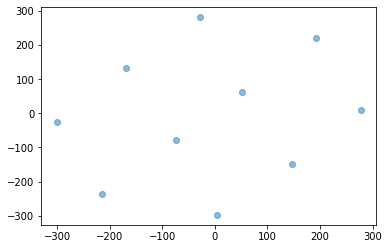

In [12]:
plt.scatter(some_examples['tsne_30_x'], some_examples['tsne_30_y'], alpha=.5)

# Encoding

In [13]:
%%time
legal_data['embedding'] = legal_data['argument'].apply(lambda x: model.encode(x))

CPU times: user 23.3 s, sys: 72.7 ms, total: 23.4 s
Wall time: 23.4 s


#TSNE

In [14]:
model_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(legal_data['embedding'].tolist())
legal_data['tsne_30_x'] = tsne[:,0]
legal_data['tsne_30_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [15]:
legal_data.head(2)

,id,argument,embedding,tsne_30_x,tsne_30_y
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254


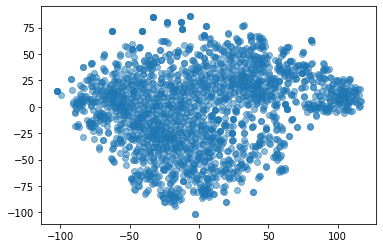

In [16]:
plt.scatter(legal_data['tsne_30_x'], legal_data['tsne_30_y'], alpha=.5)

# Clustering

In [73]:
# embedder = SentenceTransformer('distiluse-base-multilingual-cased-v2')  
def agglomerative_clustering(corpus, n_clusters, distance_threshold):
    corpus_embeddings = corpus['embedding'].tolist()
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold)#affinity='cosine', linkage='average', distance_threshold=0.4)
    clustering_model.fit_predict(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    clustered_sentences = {}
    clustered_embedding = {}
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        if cluster_id not in clustered_sentences:
            clustered_sentences[cluster_id] = []
        clustered_sentences[cluster_id].append(corpus['id'][sentence_id])
    
    df = pd.DataFrame({"cluster_id": clustered_sentences.keys(), "argument_id": clustered_sentences.values()})
    return df

In [74]:
def run_clustering(df, n_clusters, distance_threshold, figsize=(15, 15)):
  clustered_df = agglomerative_clustering(df, n_clusters=n_clusters,distance_threshold=distance_threshold)
  merged_df = pd.merge(df,clustered_df.explode('argument_id'),how='left', left_on=['id'], right_on = ['argument_id'])
  plt.figure(figsize=figsize)
  for i,group in merged_df.groupby('cluster_id'):
    plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
  plt.legend(loc='lower right')
  return merged_df

# Clustering

In [75]:
legal_data.head(2)

,id,argument,embedding,tsne_30_x,tsne_30_y
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254


In [76]:
legal_data.shape

(1951, 5)

(1951, 7)


,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,1,1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,1,2
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,0,3
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,0,4
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,0,5


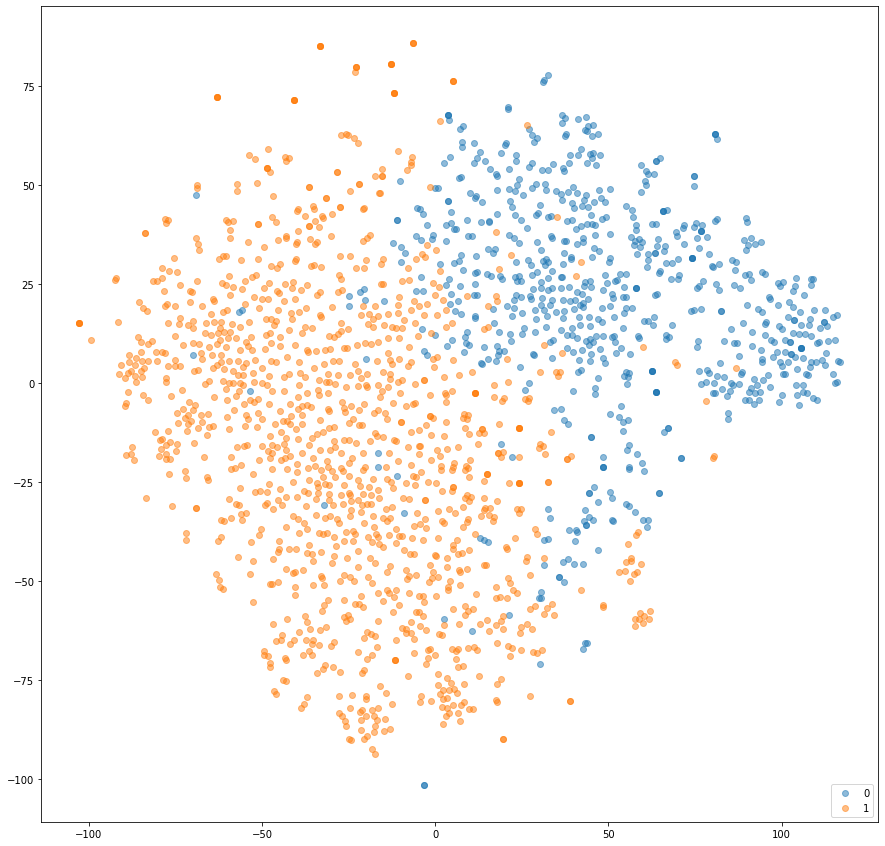

In [80]:
df = run_clustering(legal_data, n_clusters=None,distance_threshold=10.0,)
print(df.shape)
df.head()

(1951, 7)


,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,0,1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,0,2
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,1,3
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,1,4
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,1,5


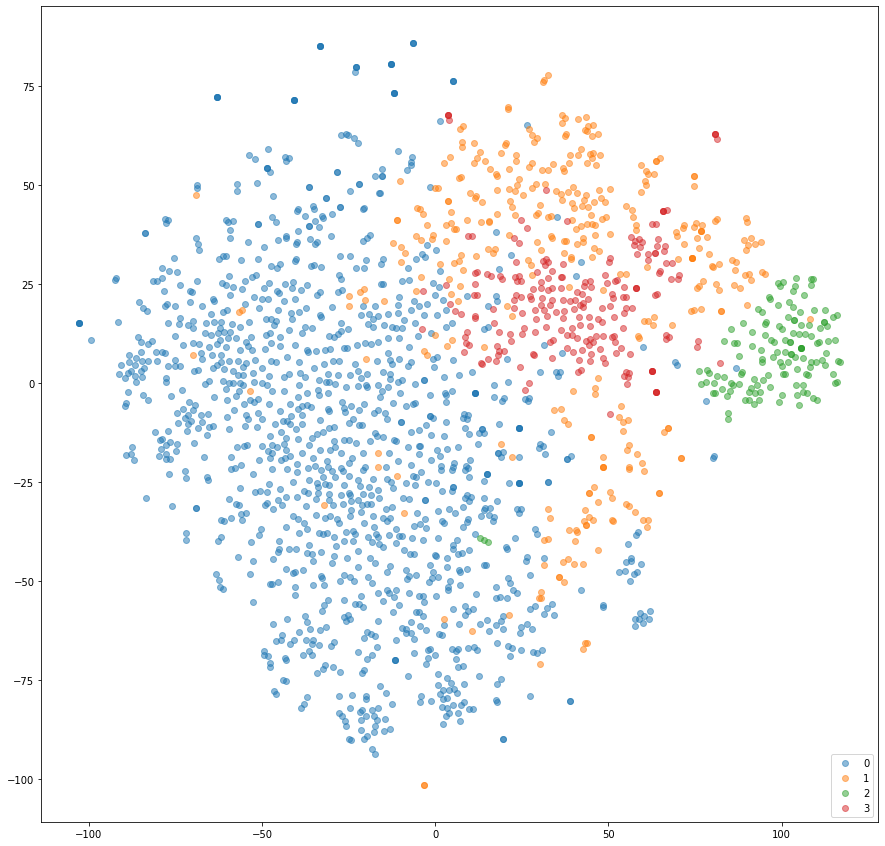

In [81]:
df = run_clustering(legal_data, n_clusters=None,distance_threshold=5.0,)
print(df.shape)
df.head()

(1951, 7)


,id,argument,embedding,tsne_30_x,tsne_30_y,cluster_id,argument_id
0,1,The Commission notes that the applicant was de...,"[-0.54420865, 0.10708204, -0.33214608, -0.1024...",-20.717447,-56.532124,16,1
1,2,He was released after the Court of Appeal revi...,"[-0.3446362, -0.1886111, 0.15328027, -0.357862...",-23.226044,-55.705254,16,2
2,3,Article 5 para. 1 (Art. 5-1) of the Conventio...,"[-0.595209, -0.112412356, 0.103474185, 0.03031...",40.096104,44.235756,13,3
3,4,The Commission finds that the applicant was de...,"[-0.7030391, -0.21792084, 0.17640072, -0.08939...",39.492611,41.208103,13,4
4,5,The Commission also finds no evidence in the c...,"[-0.6256406, -0.08068405, -0.09766886, -0.1367...",45.119465,31.979721,13,5


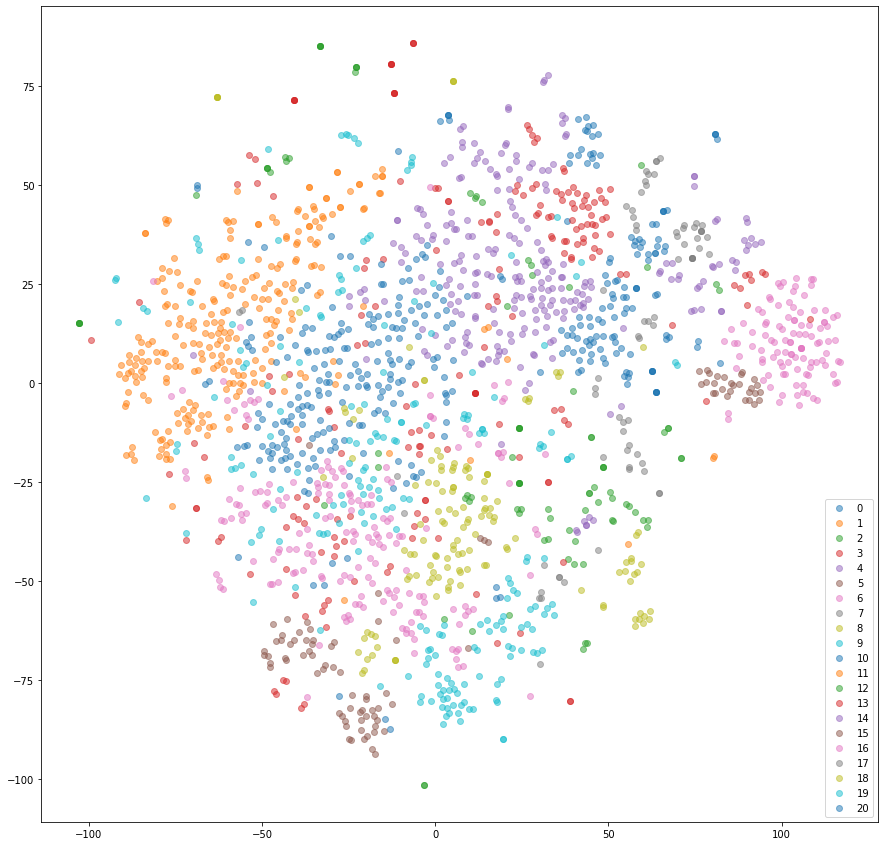

In [82]:
df = run_clustering(legal_data, n_clusters=21,distance_threshold=None,)
print(df.shape)
df.head()

In [83]:
df.shape

(1951, 7)

In [85]:
df.to_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert.csv')

In [87]:
df.to_pickle('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/echr_arguments_clustered_legal_bert.pkl')

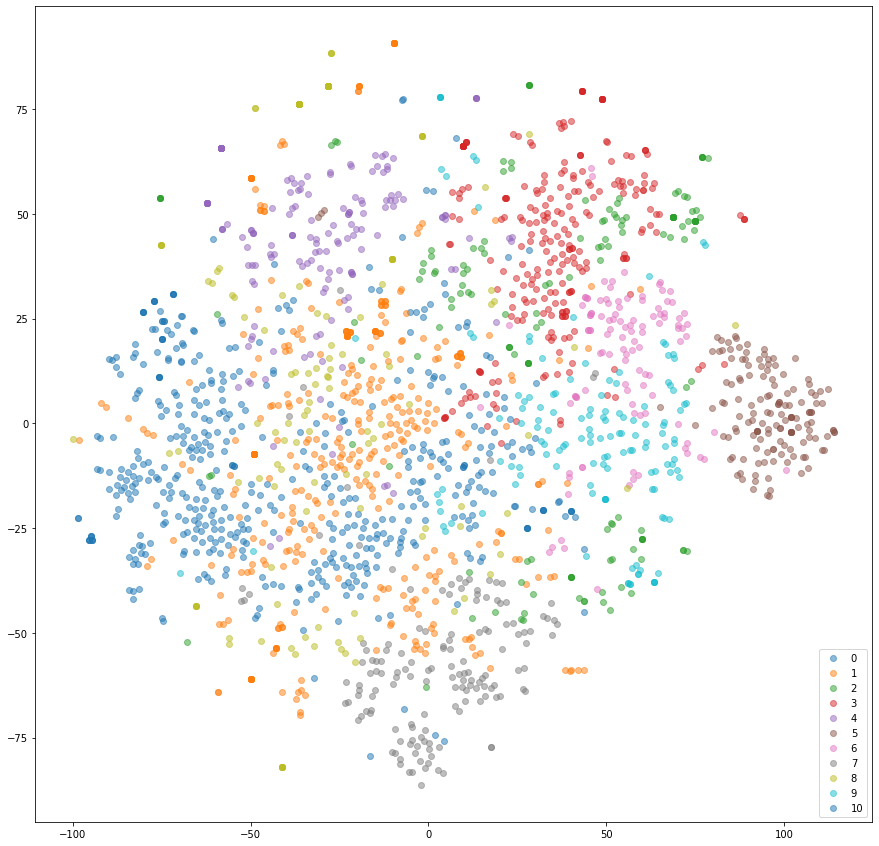

In [ ]:
run_clustering(legal_data, n_clusters=None,distance_threshold=3.0,)

# Eval on test set

### TSNE

In [ ]:
tsne = model_tsne.fit_transform(test_df['embedding'].tolist())
test_df['tsne_30_x'] = tsne[:,0]
test_df['tsne_30_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
%%time
clustered_df = agglomerative_clustering(test_df, n_clusters=None,distance_threshold=10.0)
f1,merged_df = calc_metrics(test_df, clustered_df, verbose=True)

True positives: [273 232 203]
Fasle positives: [7 1 7]
False negatives: [ 2 13  0]
Precision: [0.975      0.99570815 0.96666667]
Recall: [0.99272727 0.94693878 1.        ]
Macroaverage precision 0.9791249403910348
Macroaverage recall 0.9798886827458256
Macroaverage f1 0.9795066626918789
CPU times: user 204 ms, sys: 2.95 ms, total: 207 ms
Wall time: 263 ms


In [ ]:
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster,pred_topic
0,arg_0_0,Routine child vaccinations isn't mandatory sin...,Routine child vaccinations should be mandatory,-1,"[0.01180115, 0.040217243, 0.016415514, -0.0091...",30.182753,-0.840252,0,True,Routine child vaccinations should be mandatory
1,arg_0_1,Routine child vaccinations should not be manda...,Routine child vaccinations should be mandatory,-1,"[-0.010956358, 0.062280614, 0.02323826, -0.042...",36.057041,2.403170,0,True,Routine child vaccinations should be mandatory


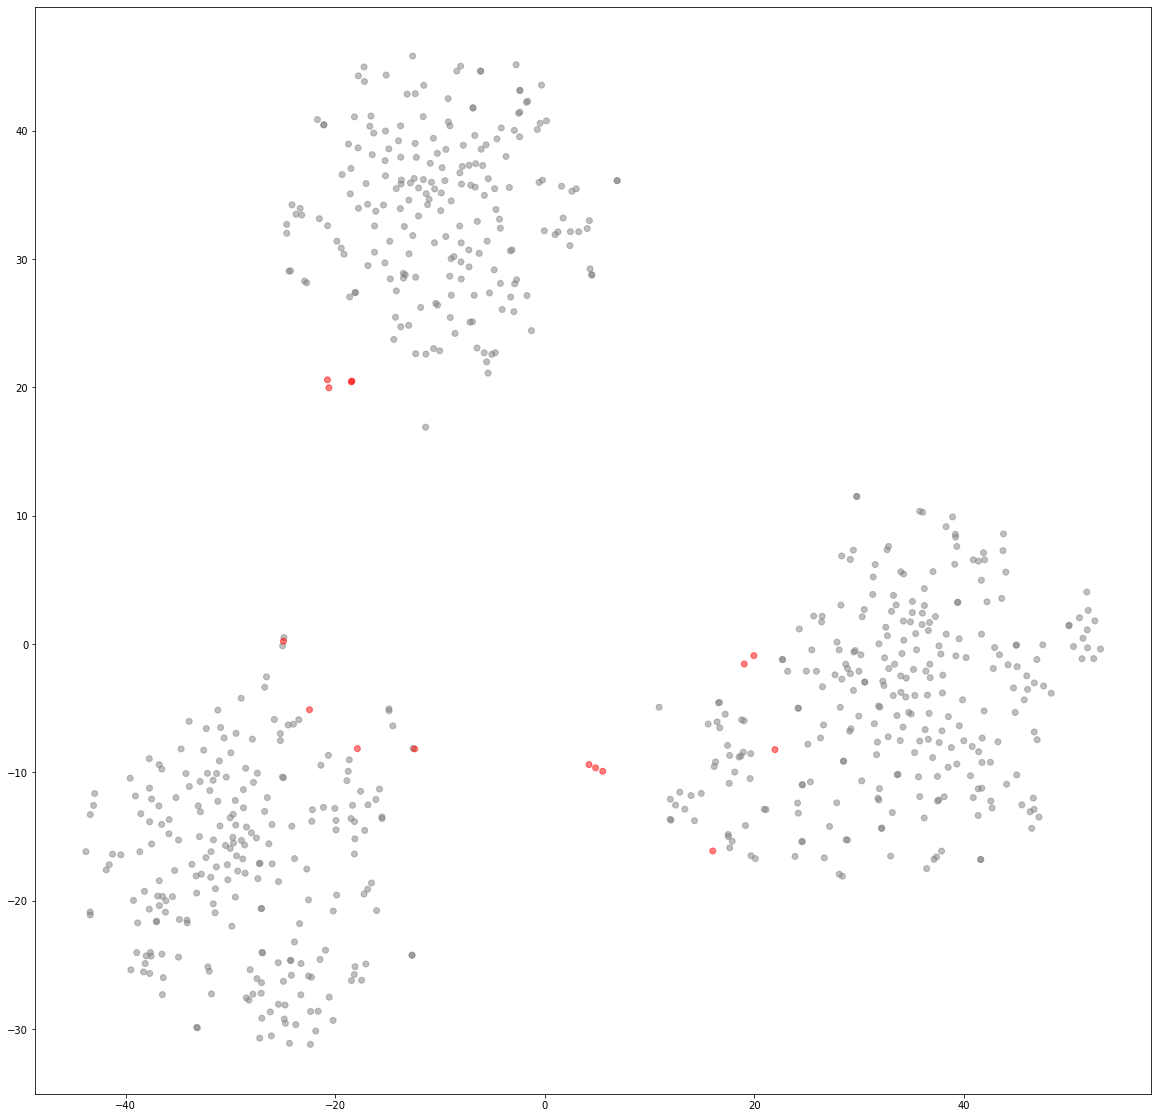

In [ ]:
import matplotlib.colors as clrs

cmap = clrs.ListedColormap(['red', 'gray'])

plt.figure(figsize=(20, 20))
plt.scatter(merged_df['tsne_30_x'], merged_df['tsne_30_y'], c = (merged_df['topic_matches_cluster']==True), alpha=.5, cmap=cmap)